# Data Analysis Examples

[Enrique Z. Losoya](https://orcid.org/0000-0001-7763-3349), Texas A&M University

Updated 12/28/2022

[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Converted from  **pandas workshop notebook** 
by [Luciano Strika](https://github.com/StrikingLoo/pandas_workshop)

## 1. Data exploration with panda

In [1]:
%matplotlib inline
import pandas as pd
import random

### First, we will generate a data set randomly

In [5]:
names = ["Albert","John","Richard","Henry","William"]
surnames = ["Goodman","Black","White","Green","Joneson"]
gender = ["F", "M"]
salaries = [500*random.randint(10,30) for _ in range(10)]

In [6]:
def generate_random_person(names, surnames, gender, salaries):
    return {"name":random.sample(names,1)[0],
            "surname":random.sample(surnames,1)[0],
            "gender":random.sample(gender,1)[0],
            "salary":random.sample(salaries,1)[0]}
def generate_people(k):
    return [generate_random_person(names, surnames, gender, salaries) for _ in range(k)]

In [7]:
generate_random_person(names, surnames, gender, salaries)

{'name': 'William', 'surname': 'Black', 'gender': 'M', 'salary': 7000}

In [8]:
df = pd.DataFrame(generate_people(50),columns=["name","surname", "gender", "salary"])

In [9]:
df.to_csv("random_people.csv")

### Now we are going to use the data

In [10]:
df = pd.read_csv("random_people.csv")

In [11]:
#start getting a feel of the data
df.head(5)

,Unnamed: 0,name,surname,gender,salary
0,0,Richard,White,F,15000
1,1,John,Joneson,M,6000
2,2,Richard,Joneson,F,10500
3,3,Richard,Joneson,F,15000
4,4,John,Black,M,7000


In [12]:
df['salary'].value_counts()

7000     16
14000     9
10500     8
6000      6
15000     5
5500      4
13500     2
Name: salary, dtype: int64

In [13]:
df['salary'].median()

7000.0

In [14]:
def tax(s):
    if s>=6000:
        return s*.7
    else:
        return s*.85

In [15]:
df["salary_after_tax"] = df["salary"].apply(tax)
df.head(5)

,Unnamed: 0,name,surname,gender,salary,salary_after_tax
0,0,Richard,White,F,15000,10500.0
1,1,John,Joneson,M,6000,4200.0
2,2,Richard,Joneson,F,10500,7350.0
3,3,Richard,Joneson,F,15000,10500.0
4,4,John,Black,M,7000,4900.0


In [16]:
df_high = df[df["salary_after_tax"]>10000]

In [17]:
df_high

,Unnamed: 0,name,surname,gender,salary,salary_after_tax
0,0,Richard,White,F,15000,10500.0
3,3,Richard,Joneson,F,15000,10500.0
8,8,Henry,White,M,15000,10500.0
11,11,Henry,Black,M,15000,10500.0
26,26,Albert,Green,M,15000,10500.0


In [18]:
df.corr()["salary"].sort_values()

Unnamed: 0         -0.063882
salary_after_tax    0.996098
salary              1.000000
Name: salary, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   name              50 non-null     object 
 2   surname           50 non-null     object 
 3   gender            50 non-null     object 
 4   salary            50 non-null     int64  
 5   salary_after_tax  50 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


## 2. Wordcloud of "The Complete Works of William Shakespeare"

Project Gutenberg’s [The Complete Works of William Shakespeare, by William
Shakespeare](https://www.gutenberg.org/files/100/100-0.txt)

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you’ll
have to check the laws of the country where you are located before using
this ebook.

In [23]:
import matplotlib.pyplot as plt
import nltk
import requests
from wordcloud import WordCloud, STOPWORDS

In [25]:
#text = open("Shakespeare.txt",'r').read()
text = requests.get('https://www.gutenberg.org/files/100/100-0.txt').text

In [28]:
','.join(STOPWORDS)

"above,don't,myself,how,doesn't,theirs,our,there,we'll,yourselves,a,yourself,we've,having,an,herself,in,it,like,that,while,some,down,couldn't,could,the,where,get,he'll,also,we,no,himself,my,they,when's,because,she,than,they'd,cannot,isn't,here,hasn't,on,wouldn't,more,then,them,we'd,won't,own,hadn't,therefore,they'll,here's,i've,same,further,shall,who's,any,who,other,and,both,by,hers,or,these,her,does,when,however,before,be,shan't,should,weren't,else,been,why,you,do,http,i'd,was,can,you'd,ours,during,your,through,whom,had,we're,once,am,between,shouldn't,from,mustn't,did,ought,out,they're,what's,to,didn't,why's,nor,few,hence,him,but,you'll,after,up,all,he's,me,of,their,what,let's,r,being,have,otherwise,since,with,under,so,how's,she'd,just,he'd,ever,its,only,themselves,were,i'm,over,against,this,not,at,that's,com,such,they've,you've,below,aren't,each,those,wasn't,very,i,too,would,itself,off,about,has,is,most,his,which,he,haven't,ourselves,until,she'll,i'll,doing,for,can't,where's,if,as,yo

In [29]:
text.strip().replace("\n", " ").replace("\r", " ");
print ("There are {} characters in the collection.".format(len(text)))

There are 5749172 characters in the collection.


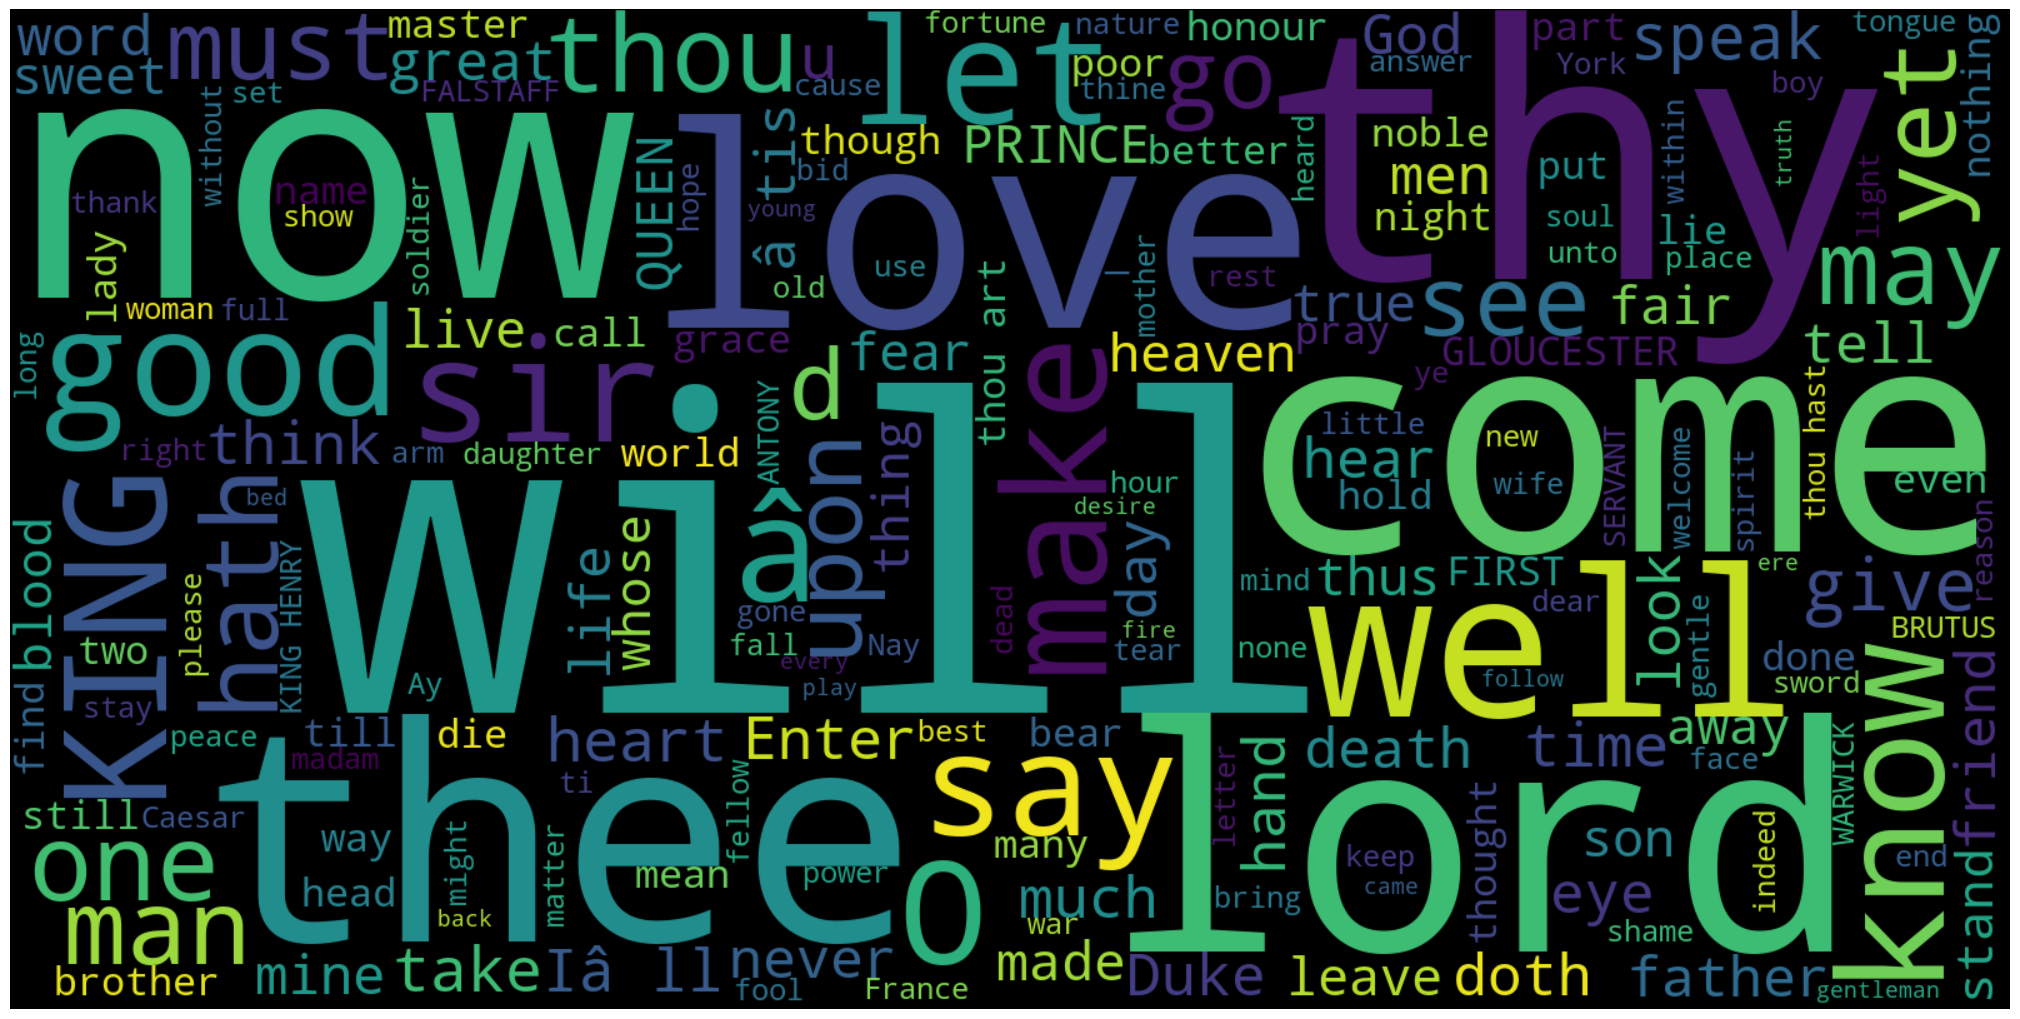

In [30]:
wordcloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS, background_color='black').generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Ucomment to save the word cloud to a file.
#wordcloud.to_file("wordcloud.png")